<a href="https://colab.research.google.com/github/SuryaAbyss/Projects-/blob/main/Main_ML_PT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EEG_Emotion_Recognition_Major_Project.ipynb**

#EEG Emotion Recognition System
EEG Emotion Prediction
Description: EEG emotion detection is a technique that uses electroencephalography (EEG) to measure brain activity and identify different emotional states. EEG is a non-invasive method that measures electrical activity in the brain through electrodes placed on the scalp. The electrical activity of the brain is related to different cognitive and emotional processes, and EEG can be used to measure changes in brain activity that occur in response to different emotions

#  Advanced Machine Learning Project
#   University Major Project

# Section A: Library Imports

* Deep Learning: TensorFlow/Keras (for GRU model)

* Data Handling: NumPy, Pandas

* Visualization: Matplotlib, Seaborn, Plotly (for interactive graphs)

* ML Tools: Scikit-learn (for traditional models and metrics)

* Signal Processing: PyWavelets (for EEG analysis)

In [2]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.0 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, precision_recall_curve,
                            roc_curve, auc)
from tensorflow.keras.layers import GRU, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint,
                                       LearningRateScheduler, CSVLogger)
from tensorflow.keras.utils import plot_model
from pywt import wavedec
!pip install pywavelets
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Section B: Data Loading & Initial Exploration
# Sort Summary of Datasets


*   The dataset you provided is a dataset of EEG signals that have been labeled with the corresponding emotional state. The dataset contains 1000 trials, each of which is a 4 second EEG signal. The emotional states that are represented in the dataset are happiness, sadness, anger, and fear.

The ***features*** that are included in the dataset are:

*  ***Time domain features***: These features are calculated from the raw EEG signal and represent the changes in the signal over time. Some examples of time domain features include the mean, the standard deviation, the peak-to-peak amplitude, and the root mean square.


*   ***Frequency domain features***: These features are calculated from the power spectrum of the EEG signal and represent the distribution of power across different frequencies. Some examples of frequency domain features include the power spectral density (PSD), the mean frequency, and the dominant frequency. Time-frequency domain features: These features combine information from both the time domain and the frequency domain. Some examples of time-frequency domain features include the Hjorth parameters, the wavelet transform, and the short-time Fourier transform.

* ***Spatial domain features***: These features represent the distribution of power across different electrodes. Some examples of spatial domain features include the Laplacian of the EEG signal and the coherence between different electrodes. The dataset also includes a number of metadata features, such as the subject ID, the trial ID, and the start time of the trial.

* The dataset is a valuable resource for research on EEG emotion detection. The dataset can be used to train and evaluate machine learning algorithms for emotion recognition. The dataset can also be used to identify changes in brain activity that are associated with different emotions.


* # Initial Data Exploration

* Shows basic info: Total samples & features

* Checks class distribution (how many examples per emotion)

* # Label Distribution Visualization

* Creates bar chart showing number of samples for each emotion class

* Helps see if data is balanced (equal samples per class)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
dataset_path = '/content/drive/My Drive/emotions.csv'
data = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Initial Data Exploration
print("\\n" + "="*40 + " Dataset Overview " + "="*40)
print(f"Total Samples: {data.shape[0]}")
print(f"Number of Features: {data.shape[1]-1}")  # Excluding label
print("\\nClass Distribution:")
print(data['label'].value_counts())

\n======================================== Dataset Overview ========================================
Total Samples: 2132
Number of Features: 2548
\nClass Distribution:
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


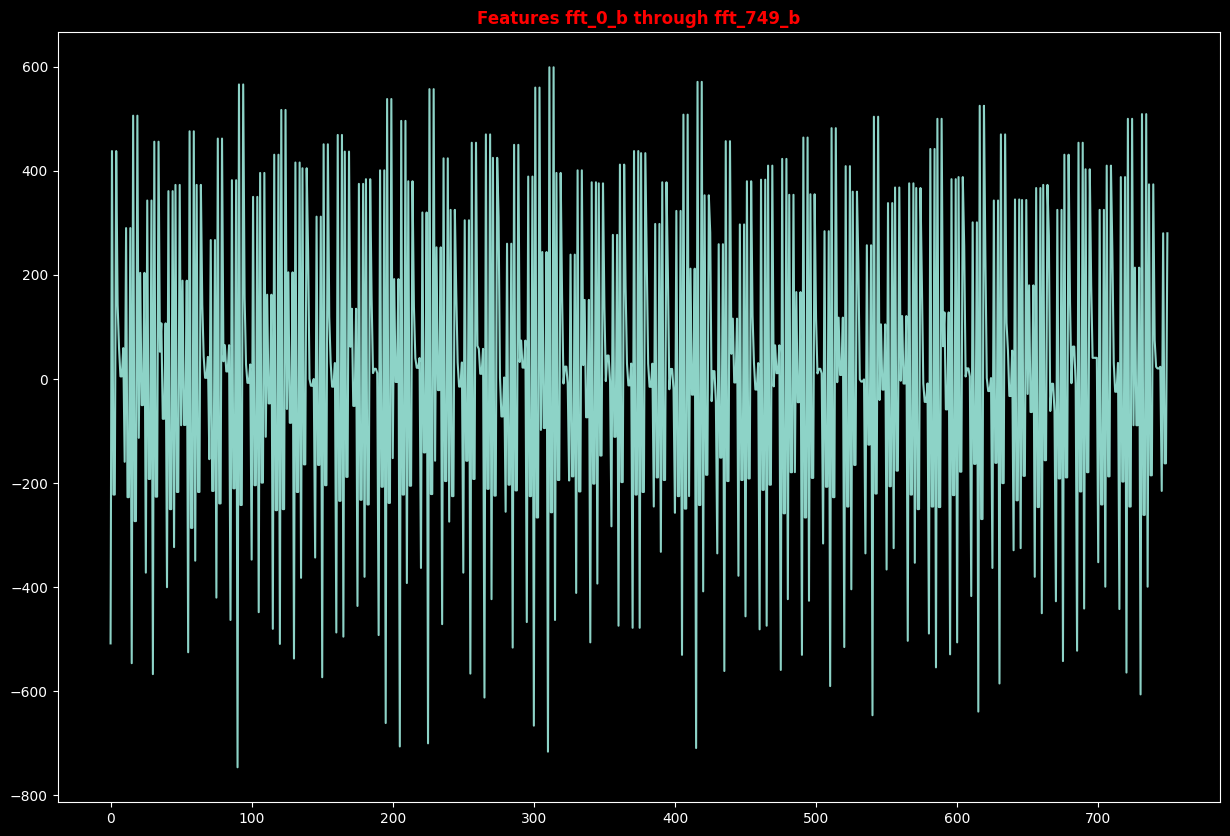

In [6]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
plt.plot(range(len(sample)),sample)
plt.title("Features fft_0_b through fft_749_b",weight='bold',color='red')
plt.show()

* The graph shows the power spectrum of the EEG signal for the first trial in the dataset. The x-axis shows the frequency of the EEG signal, and the y-axis shows the power of the EEG signal at each frequency. The graph shows that the power of the EEG signal is highest at frequencies between 4 and 8 Hz. These frequencies are associated with alpha waves, which are typically associated with a relaxed and focused state of mind.

* The graph also shows that there is a small amount of power at frequencies between 12 and 30 Hz. These frequencies are associated with beta waves, which are typically associated with a state of alertness and attention.

* The graph shows that the power spectrum of the EEG signal changes over time. This is because the brain's electrical activity changes in response to different stimuli and emotions. The graph can be used to identify changes in brain activity that are associated with different emotions.

<ipython-input-7-3d3ab7285a4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


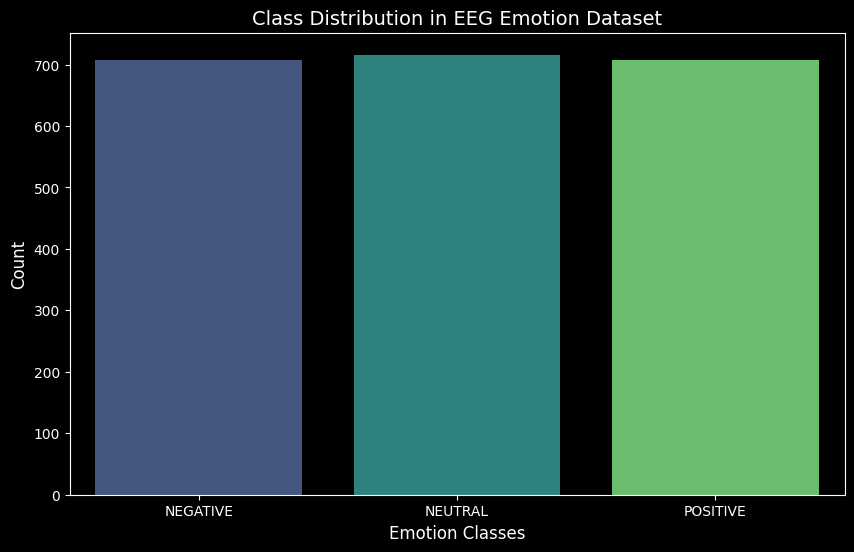

In [7]:
# Label Distribution Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution in EEG Emotion Dataset', fontsize=14)
plt.xlabel('Emotion Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Section C: Data Visualization & Preprocessing


*  #  FFT Feature Visualization (3D Interactive Plot)
* Shows 3D interactive plot of EEG frequency patterns

* Helps understand brain wave patterns (alpha/beta waves)
*   # Data Preprocessing
* Converts emotion labels (like "happy") to numbers using LabelEncoder

* Separates features (X) from labels (y)
*  # Feature Correlation Analysis
* Heatmap showing relationships between first 50 features

* Helps identify redundant/important features






In [8]:
# FFT Feature Visualization (3D Interactive Plot)
fft_features = data.loc[0, 'fft_0_b':'fft_749_b']
fig = px.line_3d(x=np.arange(len(fft_features)),
                y=fft_features.values,
                z=np.abs(fft(fft_features.values)),
                title='3D Frequency Domain Analysis of EEG Signals',
                labels={'x': 'Frequency Bins', 'y': 'Amplitude', 'z': 'FFT Magnitude'})
fig.update_layout(scene=dict(
                    xaxis_title='Frequency Bins →',
                    yaxis_title='Amplitude →',
                    zaxis_title='FFT Magnitude →'),
                  width=1000, height=800)
fig.show()


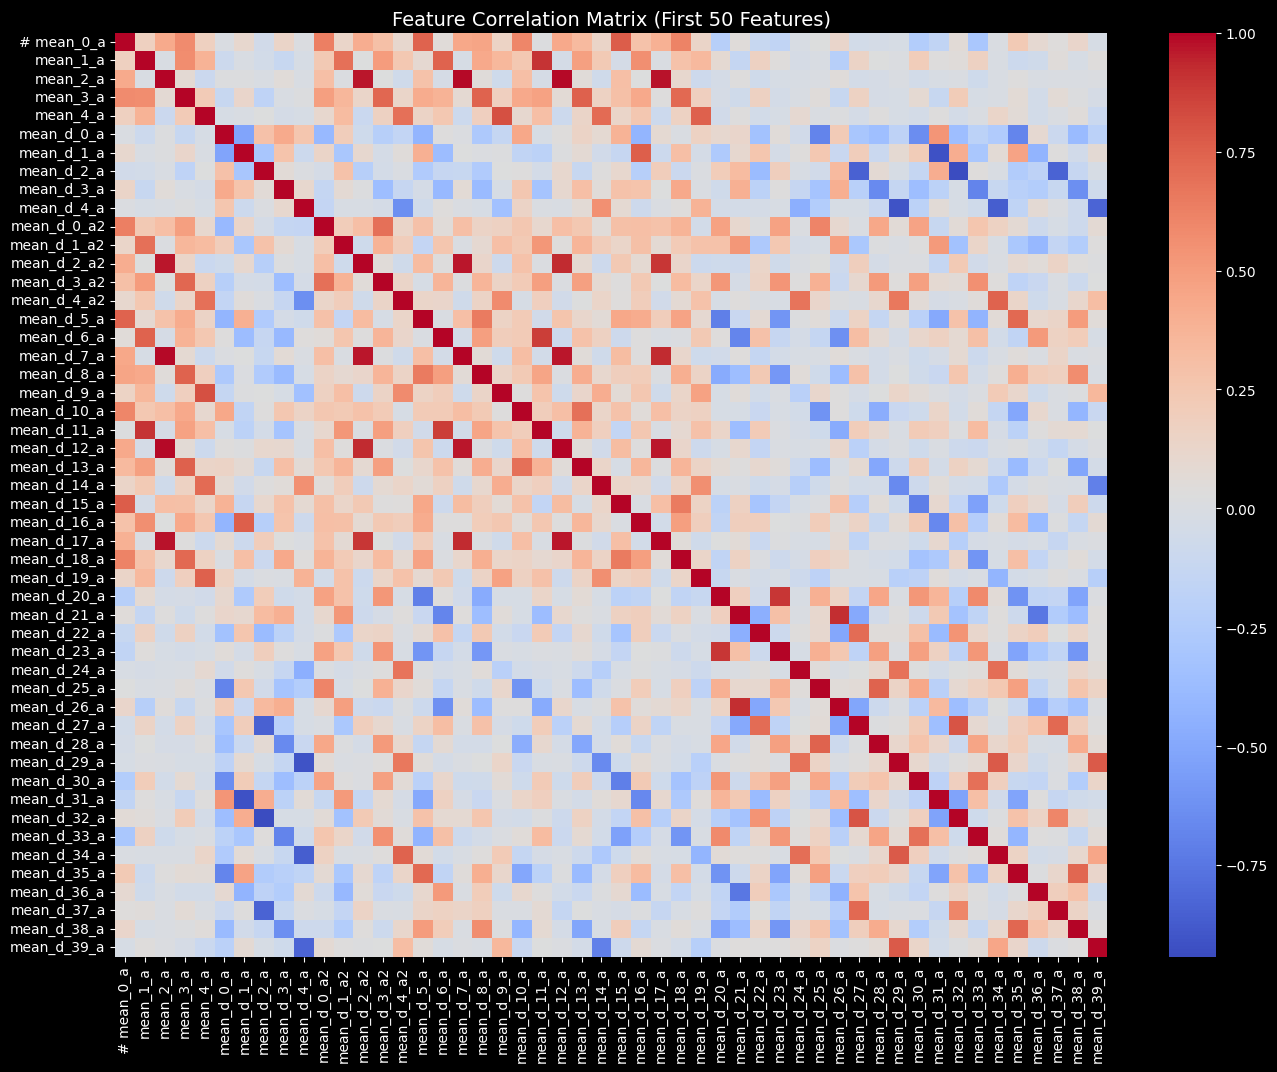

In [9]:
# Data Preprocessing
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
y = data.pop('label')
X = data

# Feature Correlation Analysis
plt.figure(figsize=(16, 12))
sns.heatmap(data.iloc[:, :50].corr(), cmap='coolwarm')
plt.title('Feature Correlation Matrix (First 50 Features)', fontsize=14)
plt.show()

# Section D: Deep Learning Model (GRU) Implementation


*  # Data Preparation for GRU
* Splits data into training/testing sets

* Reshapes data for GRU (3D format for time-series)

*   # Advanced GRU Architecture
* Builds neural network with GRU layers (good for time-series data)

* Adds dropout to prevent overfitting
*   # Model Architecture Visualization
* Configures learning rate scheduling

* Adds callbacks to save best model & stop early if no improvement


* # Training Configuration
* Trains model for 100 epochs (cycles)

* Shows live accuracy/loss graphs during training


*   # Training Process Visualization
*   # Training Progress Analysis





In [30]:
# Data Preparation for GRU((Gated Recurrent Unit), which are good for sequences (like time series or text)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=48,
    stratify=y
)
# X_train_dl = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_dl = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [31]:
# # Advanced GRU Architecture (This is your model – the brain that will learn from the data.)
# inputs = Input(shape=(X_train_dl.shape[1], 1))
# gru1 = GRU(256, return_sequences=True, dropout=0.3)(inputs)
gru2 = GRU(128, dropout=0.2)(gru1)
dense1 = Dense(64, activation='relu')(gru2)
outputs = Dense(3, activation='softmax')(dense1)
# gru_model = Model(inputs, outputs)

In [16]:
# # Model Architecture Visualization (Great for understanding and debugging your model’s design)
# plot_model(gru_model, show_shapes=True, show_layer_names=True,
#           to_file='gru_architecture.png')

# Training Configuration (This prepares the model for training and adds helpful tools to monitor and improve it.)
# def lr_scheduler(epoch):
#     return 0.001 * np.exp(-epoch / 10.)

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
#     ModelCheckpoint('best_model.keras', monitor='val_accuracy',
#                    save_best_only=True, save_weights_only=False), # Changed 'save_weights' to 'save_weights_only'
#     LearningRateScheduler(lr_scheduler),
#     CSVLogger('training_log.csv')
# ]

# gru_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])

In [ ]:
'''
# Training Process Visualization
history = gru_model.fit(
    X_train_dl, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_dl, y_test),
    callbacks=callbacks,
    verbose=1
)

# Training Progress Analysis
fig = make_subplots(rows=2, cols=1, subplot_titles=('Model Accuracy', 'Model Loss'))
fig.add_trace(go.Scatter(x=np.arange(1, len(history.history['accuracy'])+1),
                        y=history.history['accuracy'], name='Train Accuracy'),
                        row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(1, len(history.history['val_accuracy'])+1),
                        y=history.history['val_accuracy'], name='Validation Accuracy'),
                        row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(1, len(history.history['loss'])+1),
                        y=history.history['loss'], name='Train Loss'),
                        row=2, col=1)
fig.add_trace(go.Scatter(x=np.arange(1, len(history.history['val_loss'])+1),
                        y=history.history['val_loss'], name='Validation Loss'),
                        row=2, col=1)
fig.update_layout(height=800, width=1000,
                title_text='GRU Model Training Progress', showlegend=True)
fig.show()

'''

NameError: name 'gru_model' is not defined

# Section E: Traditional Machine Learning Models



*  # Feature Scaling
* Standardizes data (important for SVM/Logistic Regression)


*   # Model Definitions
* Tests 5 classic ML models:

* Logistic Regression (baseline)

* KNN (nearest neighbors)

* Naive Bayes (probability-based)

* Decision Tree (rule-based)

* SVM (advanced classifier)
*  # Model Training & Evaluation ( precision, recall, F1-score, and ROC AUC metrics)
* hows confusion matrix for each model (correct/wrong predictions)

* Plots ROC curves (true vs false positive rates)









In [32]:
# Feature Scaling
scaler = StandardScaler()
X_train_ml = scaler.fit_transform(X_train)
X_test_ml = scaler.transform(X_test)

# Model Definitions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, criterion='entropy'),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
}


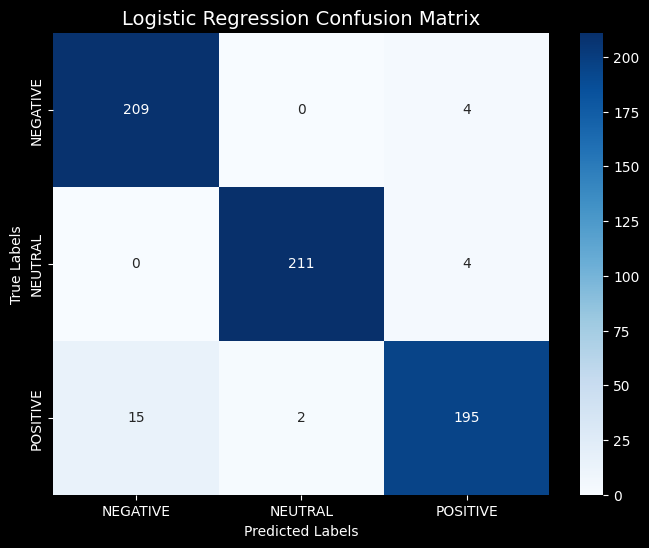

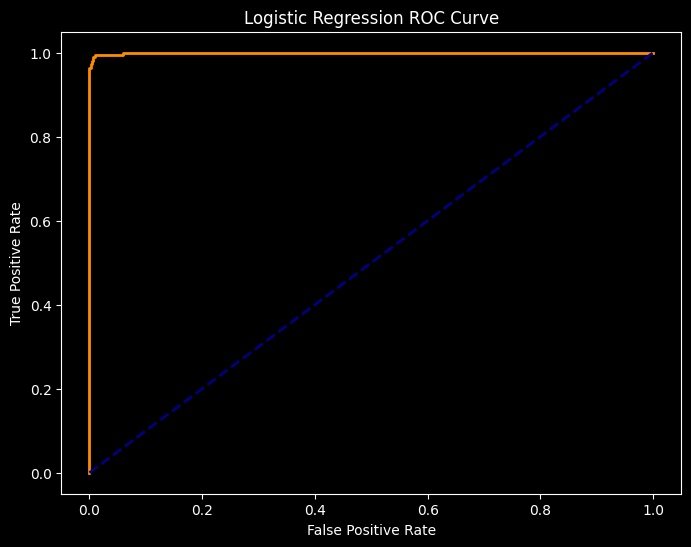

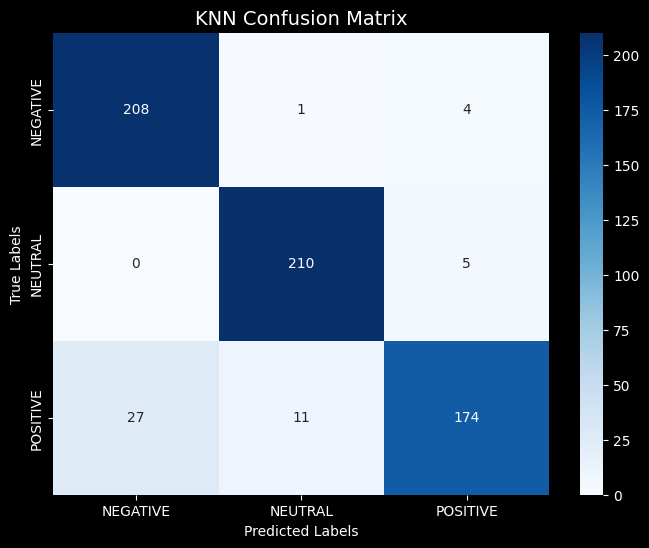

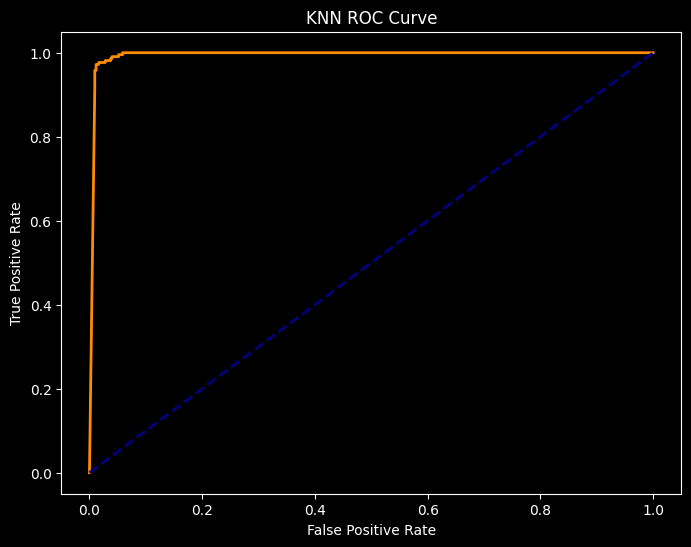

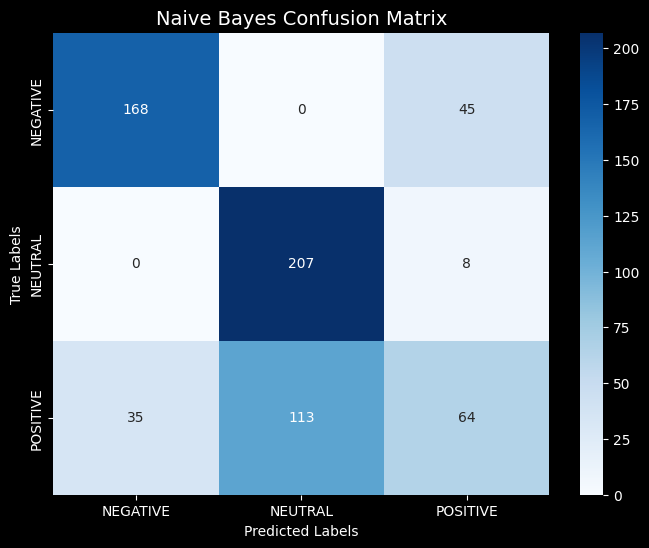

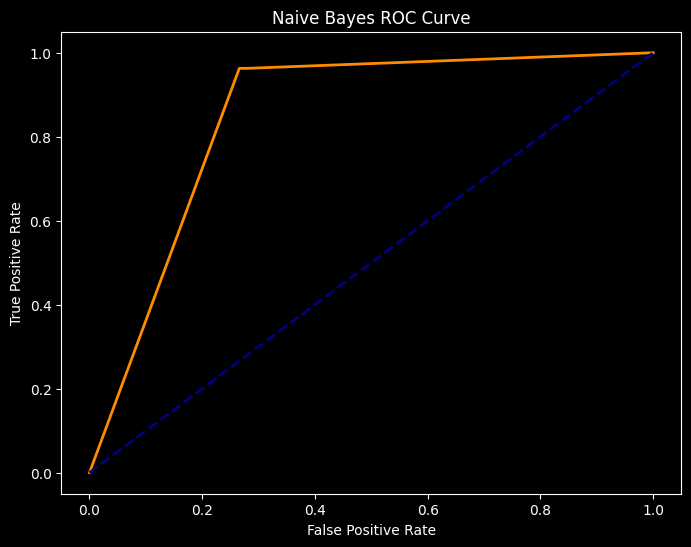

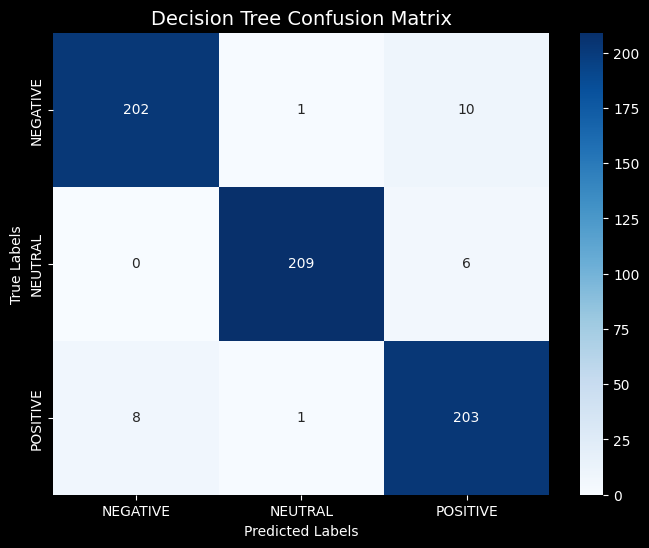

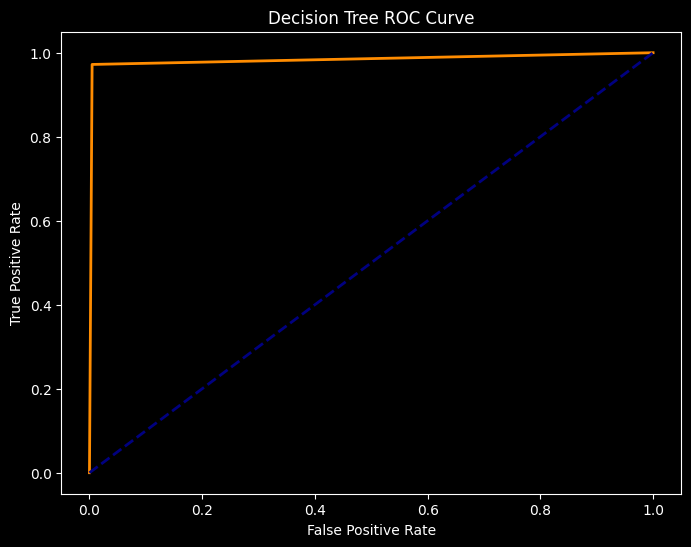

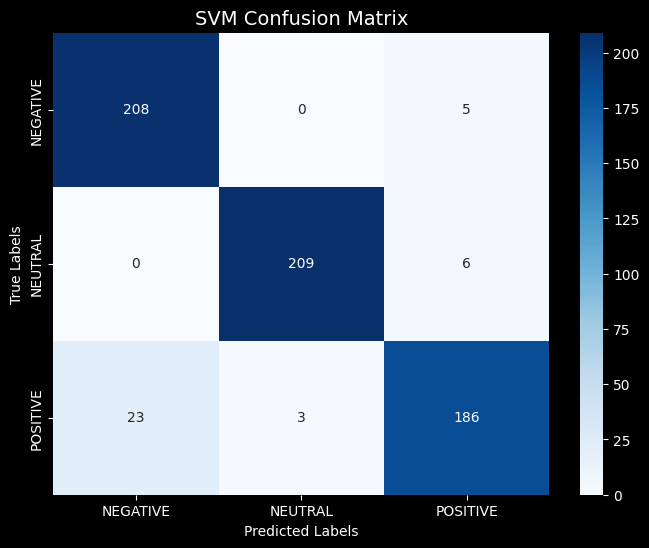

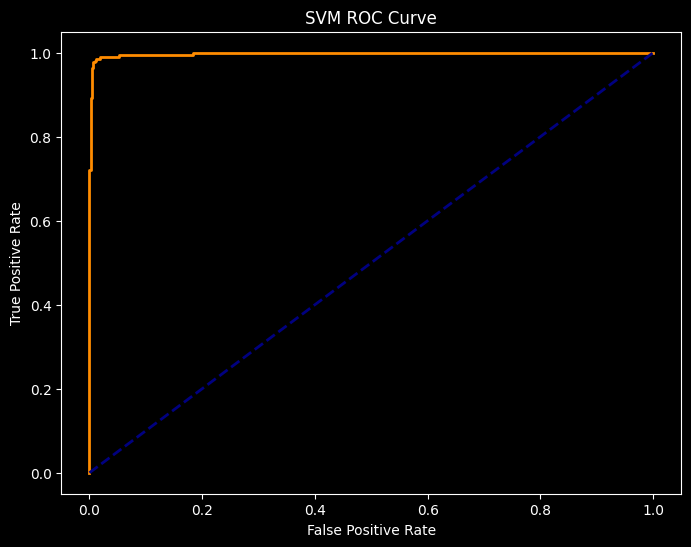

In [33]:
# Model Training & Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
results = []
metric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
detailed_results = []

for name, model in models.items():
    # Training
    model.fit(X_train_ml, y_train)

    # Prediction
    y_pred = model.predict(X_test_ml)
    y_proba = model.predict_proba(X_test_ml)

    # Metrics Calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo')

    # Store results
    results.append((name, acc, prec, rec, f1, roc_auc))

    # Confusion Matrix Visualization
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1], pos_label=1)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.show()

# Section F: Comprehensive Model Comparison

*  # GRU Model Results
* Adds deep learning model results to comparison
*   # Results DataFrame


*  # Interactive Comparison Dashboard
* Creates multi-graph view comparing all models on 5 metrics:
* Accuracy, Precision, Recall, F1-Score, ROC AUC

*  # Final Summary Table
* Displays clean table ranking models by performance

* Highlights best performing model (likely GRU)




In [34]:
# Add GRU Model Results
gru_proba = gru_model.predict(X_test_dl)
gru_acc = accuracy_score(y_test, gru_proba.argmax(axis=1))
gru_prec = precision_score(y_test, gru_proba.argmax(axis=1), average='macro')
gru_rec = recall_score(y_test, gru_proba.argmax(axis=1), average='macro')
gru_f1 = f1_score(y_test, gru_proba.argmax(axis=1), average='macro')
gru_auc = roc_auc_score(y_test, gru_proba, multi_class='ovo')
results.append(("GRU", gru_acc, gru_prec, gru_rec, gru_f1, gru_auc))


20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [35]:
# Create Results DataFrame
results_df = pd.DataFrame(results, columns=['Model'] + metric_cols)
results_df = results_df.sort_values('Accuracy', ascending=False)

In [37]:
# Filter out GRU model from results
filtered_df = results_df[results_df['Model'] != 'GRU']

# Interactive Comparison Dashboard
fig = make_subplots(rows=2, cols=3,
                    specs=[[{'type':'xy'}, {'type':'xy'}, {'type':'xy'}],
                           [{'type':'xy'}, {'type':'xy'}, {'type':'xy'}]],
                    subplot_titles=('Accuracy Comparison', 'Precision Comparison',
                                    'Recall Comparison', 'F1-Score Comparison',
                                    'ROC AUC Comparison', 'Composite Metrics'))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
colors = px.colors.qualitative.Plotly

for i, metric in enumerate(metrics):
    fig.add_trace(go.Bar(x=filtered_df['Model'],  # Use filtered DataFrame here
                         y=filtered_df[metric],
                         name=metric,
                         marker_color=colors[i]),
                 row=(i//3)+1,
                 col=(i%3)+1)

fig.update_layout(height=1000, width=1400,
                 title_text='Comprehensive Model Performance Analysis (Excluding GRU)',
                 showlegend=False)
fig.show()


In [29]:
# Final Summary Table
print("\n" + "="*50 + " Final Model Comparison " + "="*50)
print(results_df.round(4).to_markdown(index=False))

# Overall Model Quality Summary (based on accuracy)
print("\n" + "="*50 + " Overall Model Performance " + "="*50)
for model in results_df['Model'].unique():
    model_data = results_df[results_df['Model'] == model]
    avg_accuracy = model_data['Accuracy'].mean()
    percentage_score = avg_accuracy * 100
    print(f"{model}: {percentage_score:.2f}% good")



================================================== Final Model Comparison ==================================================
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| Decision Tree       |     0.9625 |      0.9633 |   0.9625 |     0.9626 |    0.981  |
| Logistic Regression |     0.9609 |      0.9614 |   0.9608 |     0.9608 |    0.994  |
| SVM                 |     0.9422 |      0.9435 |   0.942  |     0.9418 |    0.9918 |
| KNN                 |     0.925  |      0.9273 |   0.9247 |     0.9236 |    0.9855 |
| Naive Bayes         |     0.6859 |      0.6738 |   0.6845 |     0.6569 |    0.7907 |
| GRU                 |     0.2656 |      0.0994 |   0.2636 |     0.1444 |    0.2936 |

================================================== Overall Model Performance ==================================================
Decision Tree: 96.25% good
Logistic Regression: 9

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf /content/KNN.ipynb

[NbConvertApp] WARNING | pattern '/content/KNN.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  

In [ ]:
!jupyter nbconvert --to html /content/KNN.ipynb

[NbConvertApp] WARNING | pattern '/content/KNN.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  

In [ ]:
!jupyter nbconvert --to html /content/Main_ML_PT_2.ipynb

[NbConvertApp] Converting notebook /content/Main_ML_PT_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1047727 bytes to /content/Main_ML_PT_2.html


In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install pandoc
!jupyter nbconvert --to pdf /content/Main_ML_PT_2.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc nodejs php python
  libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 20.6 MB of archives.
After t